# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr X vs Chr X p22

# Modules

In [72]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [73]:
iterationNumber = 3

# 1. Read the File to Acquire the Filename

In [74]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_x': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p2

In [75]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [76]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_x': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
 

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [77]:
type(X_train_name)

dict

In [78]:
X_train_name.keys()

dict_keys(['chr_x', 'chr_x_p22_cnv'])

In [79]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  3
chr_x
   Train: 
        191128-del(X)(p22)-10L.bmp
        191128-del(X)(p22)-11L.bmp
        191128-del(X)(p22)-12L.bmp
        191128-del(X)(p22)-14L.bmp
        191128-del(X)(p22)-15L.bmp
        191128-del(X)(p22)-16L.bmp
        191128-del(X)(p22)-17L.bmp
        191128-del(X)(p22)-18L.bmp
        191128-del(X)(p22)-20L.bmp
        191128-del(X)(p22)-21L.bmp
        191128-del(X)(p22)-22L.bmp
        191128-del(X)(p22)-2L.bmp
        191128-del(X)(p22)-4L.bmp
        191128-del(X)(p22)-6L.bmp
        191128-del(X)(p22)-7L.bmp
        191128-del(X)(p22)-8L.bmp
        191128-del(X)(p22)-9L.bmp
        192478-delXq21-10L.bmp
        192478-delXq21-11L.bmp
        192478-delXq21-14L.bmp
        192478-delXq21-17L.bmp
        192478-delXq21-18L.bmp
        192478-delXq21-19L.bmp
        192478-delXq21-1L.bmp
        192478-delXq21-21L.bmp
        192478-delXq21-23L.bmp
        192478-delXq21-24L.bmp
        192478-delXq21-25L.bmp
        192478-delXq21-27L.bmp
      

### 3.1.1. Helper Functions

In [80]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [81]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [82]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [83]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [84]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [85]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [86]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [87]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [88]:
chromConvert = {
               'chr_x': 0, 
               'chr_x_p22_cnv': 1
               }

In [89]:
chromConvert_reverse = {
                0: 'chr_x', 
                1: 'chr_x_p22_cnv', 
               }

In [90]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [91]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [92]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [93]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1])

In [94]:
len(X_train)

178

In [95]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [96]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [97]:
model = Sequential()

In [98]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [99]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [100]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [101]:
start = time.time()

### 3.2.5. Compile the modal

In [102]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [103]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
3/3 [==============================] - 2s 561ms/step - loss: 3327.4358 - accuracy: 0.3876 - val_loss: 196.0794 - val_accuracy: 0.8444
Epoch 2/500
3/3 [==============================] - 0s 152ms/step - loss: 132.4193 - accuracy: 0.8483 - val_loss: 195.0444 - val_accuracy: 0.1556
Epoch 3/500
3/3 [==============================] - 0s 140ms/step - loss: 76.3507 - accuracy: 0.6236 - val_loss: 17.2422 - val_accuracy: 0.8444
Epoch 4/500
3/3 [==============================] - 0s 138ms/step - loss: 27.7302 - accuracy: 0.5899 - val_loss: 4.2486 - val_accuracy: 0.8444
Epoch 5/500
3/3 [==============================] - 0s 144ms/step - loss: 4.5223 - accuracy: 0.8483 - val_loss: 0.6836 - val_accuracy: 0.8444
Epoch 6/500
3/3 [==============================] - 0s 133ms/step - loss: 0.4490 - accuracy: 0.8483 - val_loss: 0.3943 - val_accuracy: 0.8444
Epoch 7/500
3/3 [==============================] - 0s 138ms/step - loss: 0.3109 - accuracy: 0.8876 - val_loss: 0.3771 - val_accuracy: 0.8444
E

Epoch 58/500
3/3 [==============================] - 0s 143ms/step - loss: 2.1163e-07 - accuracy: 1.0000 - val_loss: 1.2188 - val_accuracy: 0.8889
Epoch 59/500
3/3 [==============================] - 0s 143ms/step - loss: 2.0292e-07 - accuracy: 1.0000 - val_loss: 1.2198 - val_accuracy: 0.8889
Epoch 60/500
3/3 [==============================] - 0s 134ms/step - loss: 1.9757e-07 - accuracy: 1.0000 - val_loss: 1.2205 - val_accuracy: 0.8889
Epoch 61/500
3/3 [==============================] - 0s 143ms/step - loss: 1.9288e-07 - accuracy: 1.0000 - val_loss: 1.2211 - val_accuracy: 0.8889
Epoch 62/500
3/3 [==============================] - 0s 127ms/step - loss: 1.9020e-07 - accuracy: 1.0000 - val_loss: 1.2219 - val_accuracy: 0.8889
Epoch 63/500
3/3 [==============================] - 0s 140ms/step - loss: 1.8484e-07 - accuracy: 1.0000 - val_loss: 1.2228 - val_accuracy: 0.8889
Epoch 64/500
3/3 [==============================] - 0s 133ms/step - loss: 1.8015e-07 - accuracy: 1.0000 - val_loss: 1.2235 -

3/3 [==============================] - 0s 134ms/step - loss: 7.1659e-08 - accuracy: 1.0000 - val_loss: 1.2503 - val_accuracy: 0.8889
Epoch 115/500
3/3 [==============================] - 0s 144ms/step - loss: 7.0320e-08 - accuracy: 1.0000 - val_loss: 1.2506 - val_accuracy: 0.8889
Epoch 116/500
3/3 [==============================] - 0s 134ms/step - loss: 7.0320e-08 - accuracy: 1.0000 - val_loss: 1.2512 - val_accuracy: 0.8889
Epoch 117/500
3/3 [==============================] - 0s 133ms/step - loss: 7.0320e-08 - accuracy: 1.0000 - val_loss: 1.2518 - val_accuracy: 0.8889
Epoch 118/500
3/3 [==============================] - 0s 131ms/step - loss: 7.0320e-08 - accuracy: 1.0000 - val_loss: 1.2519 - val_accuracy: 0.8889
Epoch 119/500
3/3 [==============================] - 0s 133ms/step - loss: 6.9650e-08 - accuracy: 1.0000 - val_loss: 1.2525 - val_accuracy: 0.8889
Epoch 120/500
3/3 [==============================] - 0s 144ms/step - loss: 6.5632e-08 - accuracy: 1.0000 - val_loss: 1.2525 - val_ac

Epoch 170/500
3/3 [==============================] - 0s 139ms/step - loss: 4.1522e-08 - accuracy: 1.0000 - val_loss: 1.2588 - val_accuracy: 0.8889
Epoch 171/500
3/3 [==============================] - 0s 143ms/step - loss: 4.1522e-08 - accuracy: 1.0000 - val_loss: 1.2586 - val_accuracy: 0.8889
Epoch 172/500
3/3 [==============================] - 0s 144ms/step - loss: 4.0183e-08 - accuracy: 1.0000 - val_loss: 1.2591 - val_accuracy: 0.8889
Epoch 173/500
3/3 [==============================] - 0s 135ms/step - loss: 4.0853e-08 - accuracy: 1.0000 - val_loss: 1.2591 - val_accuracy: 0.8889
Epoch 174/500
3/3 [==============================] - 0s 138ms/step - loss: 3.9513e-08 - accuracy: 1.0000 - val_loss: 1.2596 - val_accuracy: 0.8889
Epoch 175/500
3/3 [==============================] - 0s 142ms/step - loss: 3.8843e-08 - accuracy: 1.0000 - val_loss: 1.2598 - val_accuracy: 0.8889
Epoch 176/500
3/3 [==============================] - 0s 126ms/step - loss: 3.8174e-08 - accuracy: 1.0000 - val_loss: 1

Epoch 226/500
3/3 [==============================] - 0s 135ms/step - loss: 2.4110e-08 - accuracy: 1.0000 - val_loss: 1.2696 - val_accuracy: 0.8889
Epoch 227/500
3/3 [==============================] - 0s 130ms/step - loss: 2.3440e-08 - accuracy: 1.0000 - val_loss: 1.2694 - val_accuracy: 0.8889
Epoch 228/500
3/3 [==============================] - 0s 168ms/step - loss: 2.3440e-08 - accuracy: 1.0000 - val_loss: 1.2695 - val_accuracy: 0.8889
Epoch 229/500
3/3 [==============================] - 0s 138ms/step - loss: 2.3440e-08 - accuracy: 1.0000 - val_loss: 1.2696 - val_accuracy: 0.8889
Epoch 230/500
3/3 [==============================] - 0s 140ms/step - loss: 2.3440e-08 - accuracy: 1.0000 - val_loss: 1.2697 - val_accuracy: 0.8889
Epoch 231/500
3/3 [==============================] - 0s 144ms/step - loss: 2.3440e-08 - accuracy: 1.0000 - val_loss: 1.2701 - val_accuracy: 0.8889
Epoch 232/500
3/3 [==============================] - 0s 138ms/step - loss: 2.2770e-08 - accuracy: 1.0000 - val_loss: 1

Epoch 282/500
3/3 [==============================] - 0s 144ms/step - loss: 1.8082e-08 - accuracy: 1.0000 - val_loss: 1.2816 - val_accuracy: 0.8889
Epoch 283/500
3/3 [==============================] - 0s 140ms/step - loss: 1.6743e-08 - accuracy: 1.0000 - val_loss: 1.2817 - val_accuracy: 0.8889
Epoch 284/500
3/3 [==============================] - 0s 133ms/step - loss: 1.6743e-08 - accuracy: 1.0000 - val_loss: 1.2818 - val_accuracy: 0.8889
Epoch 285/500
3/3 [==============================] - 0s 149ms/step - loss: 1.6743e-08 - accuracy: 1.0000 - val_loss: 1.2821 - val_accuracy: 0.8889
Epoch 286/500
3/3 [==============================] - 0s 144ms/step - loss: 1.6073e-08 - accuracy: 1.0000 - val_loss: 1.2823 - val_accuracy: 0.8889
Epoch 287/500
3/3 [==============================] - 0s 148ms/step - loss: 1.6073e-08 - accuracy: 1.0000 - val_loss: 1.2826 - val_accuracy: 0.8889
Epoch 288/500
3/3 [==============================] - 0s 135ms/step - loss: 1.6743e-08 - accuracy: 1.0000 - val_loss: 1

Epoch 338/500
3/3 [==============================] - 0s 137ms/step - loss: 1.2725e-08 - accuracy: 1.0000 - val_loss: 1.2869 - val_accuracy: 0.8889
Epoch 339/500
3/3 [==============================] - 0s 133ms/step - loss: 1.2725e-08 - accuracy: 1.0000 - val_loss: 1.2870 - val_accuracy: 0.8889
Epoch 340/500
3/3 [==============================] - 0s 145ms/step - loss: 1.2725e-08 - accuracy: 1.0000 - val_loss: 1.2870 - val_accuracy: 0.8889
Epoch 341/500
3/3 [==============================] - 0s 145ms/step - loss: 1.2725e-08 - accuracy: 1.0000 - val_loss: 1.2870 - val_accuracy: 0.8889
Epoch 342/500
3/3 [==============================] - 0s 141ms/step - loss: 1.2725e-08 - accuracy: 1.0000 - val_loss: 1.2869 - val_accuracy: 0.8889
Epoch 343/500
3/3 [==============================] - 0s 141ms/step - loss: 1.2725e-08 - accuracy: 1.0000 - val_loss: 1.2871 - val_accuracy: 0.8889
Epoch 344/500
3/3 [==============================] - 0s 145ms/step - loss: 1.2725e-08 - accuracy: 1.0000 - val_loss: 1

Epoch 394/500
3/3 [==============================] - 0s 143ms/step - loss: 7.3669e-09 - accuracy: 1.0000 - val_loss: 1.2948 - val_accuracy: 0.8889
Epoch 395/500
3/3 [==============================] - 0s 136ms/step - loss: 7.3669e-09 - accuracy: 1.0000 - val_loss: 1.2948 - val_accuracy: 0.8889
Epoch 396/500
3/3 [==============================] - 0s 142ms/step - loss: 7.3669e-09 - accuracy: 1.0000 - val_loss: 1.2949 - val_accuracy: 0.8889
Epoch 397/500
3/3 [==============================] - 0s 132ms/step - loss: 8.0366e-09 - accuracy: 1.0000 - val_loss: 1.2948 - val_accuracy: 0.8889
Epoch 398/500
3/3 [==============================] - 0s 137ms/step - loss: 7.3669e-09 - accuracy: 1.0000 - val_loss: 1.2949 - val_accuracy: 0.8889
Epoch 399/500
3/3 [==============================] - 0s 148ms/step - loss: 6.6972e-09 - accuracy: 1.0000 - val_loss: 1.2951 - val_accuracy: 0.8889
Epoch 400/500
3/3 [==============================] - 0s 136ms/step - loss: 6.6972e-09 - accuracy: 1.0000 - val_loss: 1

Epoch 450/500
3/3 [==============================] - 0s 142ms/step - loss: 6.0274e-09 - accuracy: 1.0000 - val_loss: 1.3012 - val_accuracy: 0.8889
Epoch 451/500
3/3 [==============================] - 0s 148ms/step - loss: 5.3577e-09 - accuracy: 1.0000 - val_loss: 1.3014 - val_accuracy: 0.8889
Epoch 452/500
3/3 [==============================] - 0s 142ms/step - loss: 5.3577e-09 - accuracy: 1.0000 - val_loss: 1.3017 - val_accuracy: 0.8889
Epoch 453/500
3/3 [==============================] - 0s 138ms/step - loss: 6.0274e-09 - accuracy: 1.0000 - val_loss: 1.3019 - val_accuracy: 0.8889
Epoch 454/500
3/3 [==============================] - 0s 142ms/step - loss: 6.6972e-09 - accuracy: 1.0000 - val_loss: 1.3019 - val_accuracy: 0.8889
Epoch 455/500
3/3 [==============================] - 0s 130ms/step - loss: 5.3577e-09 - accuracy: 1.0000 - val_loss: 1.3020 - val_accuracy: 0.8889
Epoch 456/500
3/3 [==============================] - 0s 140ms/step - loss: 5.3577e-09 - accuracy: 1.0000 - val_loss: 1

### 3.2.7 Summary

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

### 3.2.8. Tensorboard Display

In [105]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4700), started 22 days, 8:05:04 ago. (Use '!kill 4700' to kill it.)

In [106]:
end = time.time()
print('Time elapsed: ', (end - start)/60, ' minutes.')

Time elapsed:  40.77149005730947  minutes.


## 3.8 Save the Model

In [107]:
model.save('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_X_cnn_iteration_3\assets


## 3.9 Load the Model

In [108]:
model_reload = keras.models.load_model('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [109]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.889


In [110]:
len(X_test)

45

In [111]:
y_predict = model_reload.predict(X_test)

In [112]:
len(y_predict)

45

In [113]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [114]:
len(y_predict_filtered)

45

In [115]:
label = ['chr_x', 'chr_x_p22_cnv']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [116]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [117]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [118]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [119]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [120]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1])

In [121]:
y_predict

array([[1.00000000e+00, 9.54991108e-09],
       [9.99995947e-01, 7.02958860e-05],
       [9.99935389e-01, 2.37495973e-04],
       [9.99999762e-01, 1.30588307e-06],
       [9.99998927e-01, 1.85962097e-06],
       [1.00000000e+00, 5.65434050e-07],
       [9.99999523e-01, 1.71023805e-06],
       [1.00000000e+00, 2.93229817e-07],
       [9.96310055e-01, 3.60127841e-03],
       [9.92761433e-01, 7.53383059e-03],
       [9.99999881e-01, 5.30331874e-07],
       [5.50910644e-02, 9.82283771e-01],
       [9.99999762e-01, 4.03111699e-06],
       [1.00000000e+00, 4.22707602e-09],
       [1.00000000e+00, 9.68697345e-12],
       [9.96421456e-01, 1.06972242e-02],
       [1.00000000e+00, 8.61836991e-12],
       [9.34162438e-01, 9.96774584e-02],
       [9.99539137e-01, 6.68481574e-04],
       [1.00000000e+00, 2.31642403e-08],
       [1.00000000e+00, 1.23328781e-09],
       [9.99999523e-01, 2.60688671e-06],
       [1.00000000e+00, 1.32918004e-07],
       [9.99999881e-01, 3.94697906e-07],
       [9.999811

### 3.10.2. Classification Report

In [122]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

               precision    recall  f1-score   support

        chr_x       0.92      0.95      0.94        38
chr_x_p22_cnv       0.67      0.57      0.62         7

    micro avg       0.89      0.89      0.89        45
    macro avg       0.79      0.76      0.78        45
 weighted avg       0.88      0.89      0.89        45



### 3.10.3. Confusion Matrix

In [123]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_X_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_x,chr_x_p22_cnv
chr_x,36,2
chr_x_p22_cnv,3,4


#### Heat Map

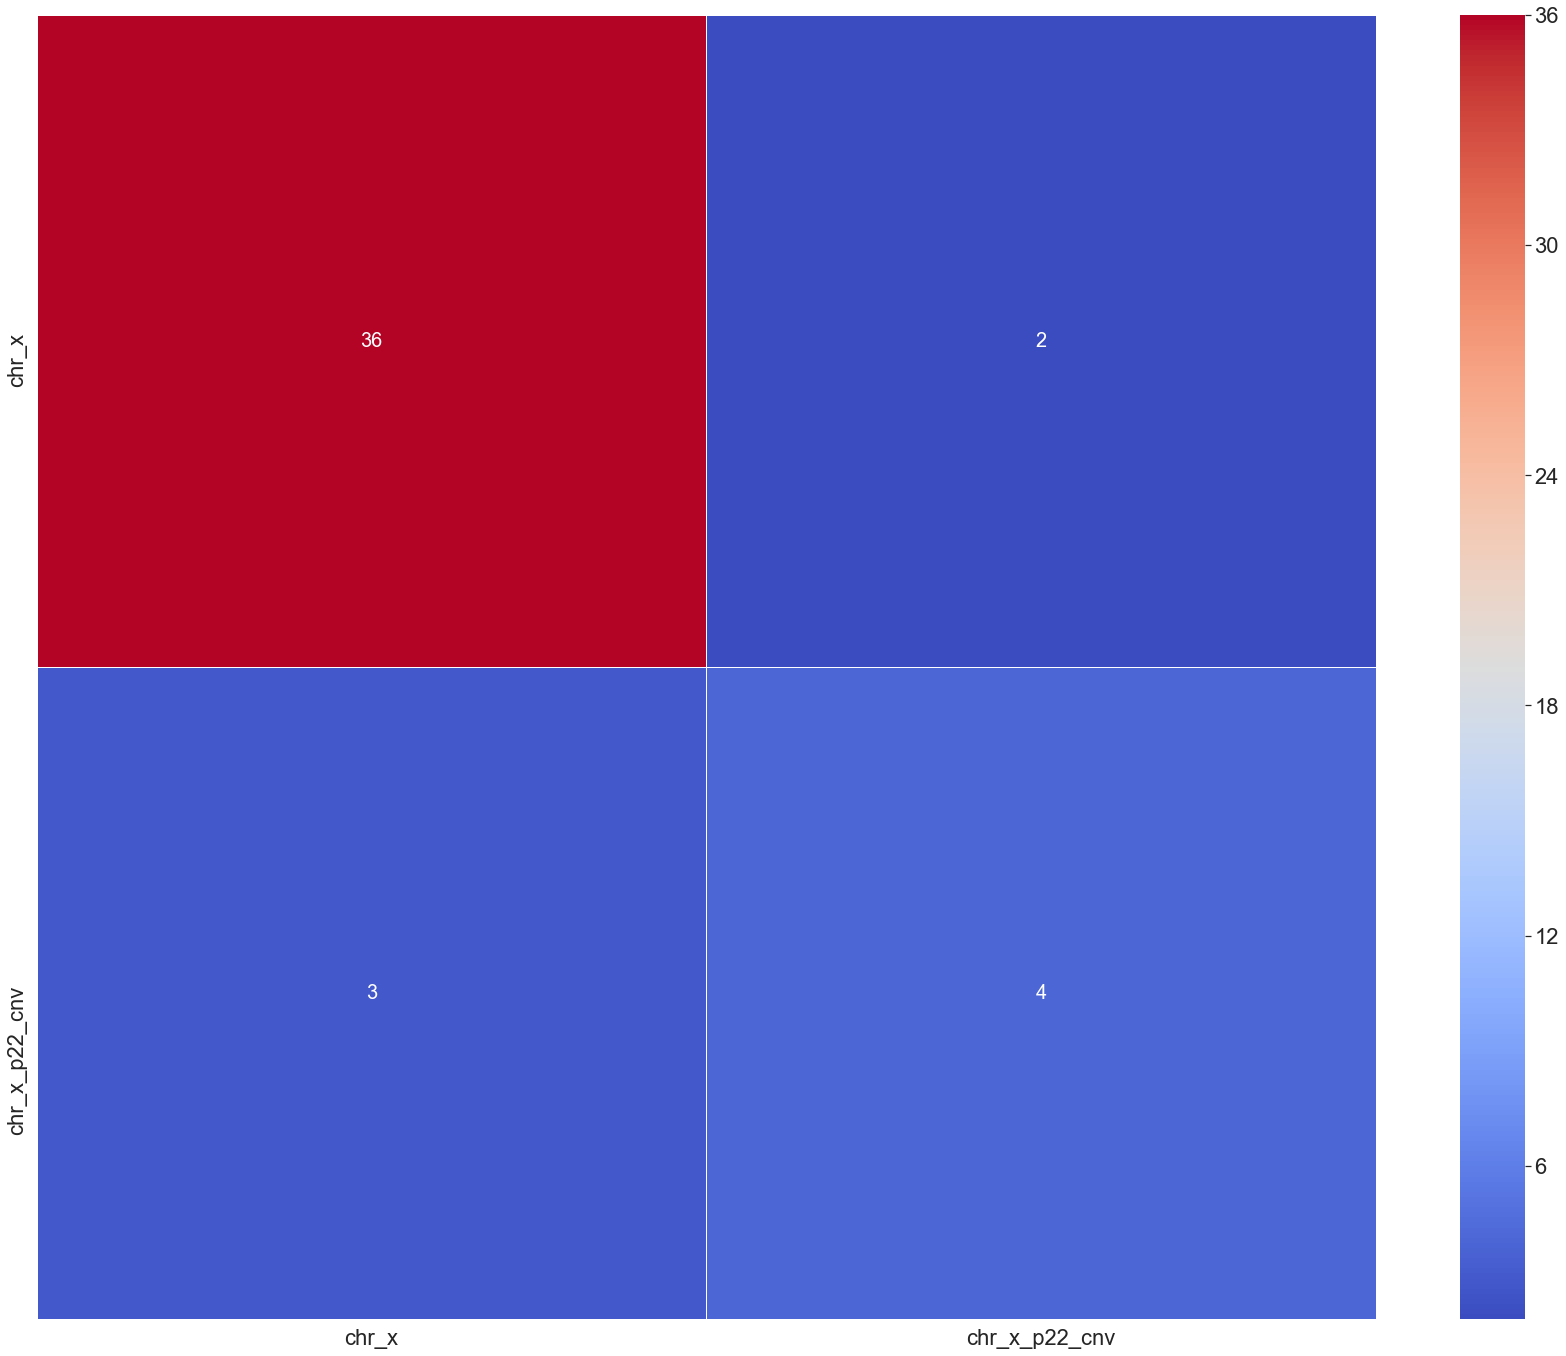

In [124]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [125]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_X_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [126]:
y_predict

array([[1.00000000e+00, 9.54991108e-09],
       [9.99995947e-01, 7.02958860e-05],
       [9.99935389e-01, 2.37495973e-04],
       [9.99999762e-01, 1.30588307e-06],
       [9.99998927e-01, 1.85962097e-06],
       [1.00000000e+00, 5.65434050e-07],
       [9.99999523e-01, 1.71023805e-06],
       [1.00000000e+00, 2.93229817e-07],
       [9.96310055e-01, 3.60127841e-03],
       [9.92761433e-01, 7.53383059e-03],
       [9.99999881e-01, 5.30331874e-07],
       [5.50910644e-02, 9.82283771e-01],
       [9.99999762e-01, 4.03111699e-06],
       [1.00000000e+00, 4.22707602e-09],
       [1.00000000e+00, 9.68697345e-12],
       [9.96421456e-01, 1.06972242e-02],
       [1.00000000e+00, 8.61836991e-12],
       [9.34162438e-01, 9.96774584e-02],
       [9.99539137e-01, 6.68481574e-04],
       [1.00000000e+00, 2.31642403e-08],
       [1.00000000e+00, 1.23328781e-09],
       [9.99999523e-01, 2.60688671e-06],
       [1.00000000e+00, 1.32918004e-07],
       [9.99999881e-01, 3.94697906e-07],
       [9.999811

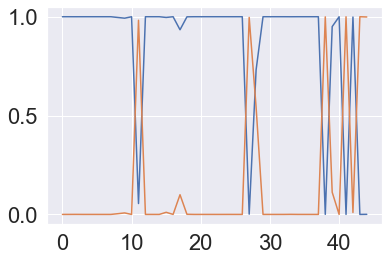

In [127]:
plt.plot(y_predict)

In [128]:
y_predict_1D = y_predict[:,0]

In [129]:
y_predict_1D_processed = 1- y_predict_1D

In [130]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [131]:
auc_rf

0.9097744360902256

In [132]:
x = y = np.arange(0,1.1,0.1)

In [133]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

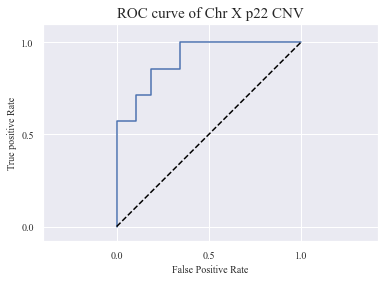

In [134]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr X p22 CNV', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_X_p22_CNV_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [135]:
auc_value = auc(fpr, tpr)

In [136]:
print('AUC is ', auc_value)

AUC is  0.9097744360902256


# Results

In [137]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.889


In [138]:
print(performanceReport)

               precision    recall  f1-score   support

        chr_x       0.92      0.95      0.94        38
chr_x_p22_cnv       0.67      0.57      0.62         7

    micro avg       0.89      0.89      0.89        45
    macro avg       0.79      0.76      0.78        45
 weighted avg       0.88      0.89      0.89        45



In [139]:
type(performanceReport)

str

In [140]:
confusion

,chr_x,chr_x_p22_cnv
chr_x,36,2
chr_x_p22_cnv,3,4


In [141]:
print('AUC is ', auc_value)

AUC is  0.9097744360902256


## Export to a text file

In [142]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()